# PIL image processing to enhance X-Ray images
[PIL tutorial](https://pillow.readthedocs.io/en/4.0.x/handbook/tutorial.html) <br>
[]() <br>
[]() <br>
[]() <br>
[]() <br>
[Glob StackOverflow](https://stackoverflow.com/questions/14798220/how-can-i-search-sub-folders-using-glob-glob-module-in-python) <br>

In [6]:
%matplotlib inline
import os
import sys
import time

import glob
import pylab
import pandas as pd
import pydicom
import numpy as np

import PIL as pilo
from PIL import Image

# '../../src/dcm_wrangler.py'
sys.path.insert(1, '../../src/')
import kaggle_wrangler as kgwr

In [7]:
#                                                                        Locate the Directories
kaggle_data_dir = '../../data/all'
train_data_dir = os.path.join(kaggle_data_dir, 'stage_1_train_images')
test_data_dir = os.path.join(kaggle_data_dir, 'stage_1_test_images')

train_labels_csv = 'stage_1_train_labels.csv'
class_labels_csv = 'stage_1_detailed_class_info.csv'
os.path.isdir(kaggle_data_dir)

True

In [8]:
#                                                                        Read and parse the labels
labels_df = pd.read_csv(os.path.join(kaggle_data_dir, train_labels_csv))
class_df = pd.read_csv(os.path.join(kaggle_data_dir, class_labels_csv))
# dfinal = labels_df.merge(class_df, on="patientId", how='inner')

parsed = kgwr.parse_data(labels_df, train_data_dir)
pt_Id_list = sorted(list(parsed.keys()))

In [13]:
#                                                                        Display the labels & classes
n = 12
print(labels_df.head(n), '\n\n', class_df.head(n))

                               patientId      x      y  width  height  Target
0   0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1   00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2   00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3   003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4   00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1
5   00436515-870c-4b36-a041-de91049b9ab4  562.0  152.0  256.0   453.0       1
6   00569f44-917d-4c86-a842-81832af98c30    NaN    NaN    NaN     NaN       0
7   006cec2e-6ce2-4549-bffa-eadfcd1e9970    NaN    NaN    NaN     NaN       0
8   00704310-78a8-4b38-8475-49f4573b2dbb  323.0  577.0  160.0   104.0       1
9   00704310-78a8-4b38-8475-49f4573b2dbb  695.0  575.0  162.0   137.0       1
10  008c19e8-a820-403a-930a-bc74a4053664    NaN    NaN    NaN     NaN       0
11  009482dc-3db5-48d4-8580-5c89c4f01334    NaN    NaN    NaN   

In [14]:
#                                                                        Read an dcm file
patientId = labels_df['patientId'][0]
train_data_dir
dcm_file = os.path.join(train_data_dir, '%s.dcm' % patientId)
dcm_data = pydicom.read_file(dcm_file)
print(dcm_data)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0020) Patient ID                          LO: '0004cfab-14fd-4e49-80ba-63a80b6bddd6'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

(-0.5, 1023.5, 1023.5, -0.5)

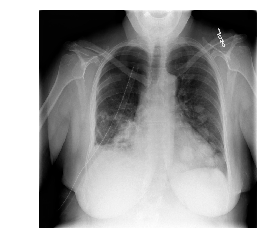

In [15]:
#                                                                        Open the & display image
one_im = dcm_data.pixel_array
pylab.imshow(one_im, cmap=pylab.cm.gist_gray)
pylab.axis('off')

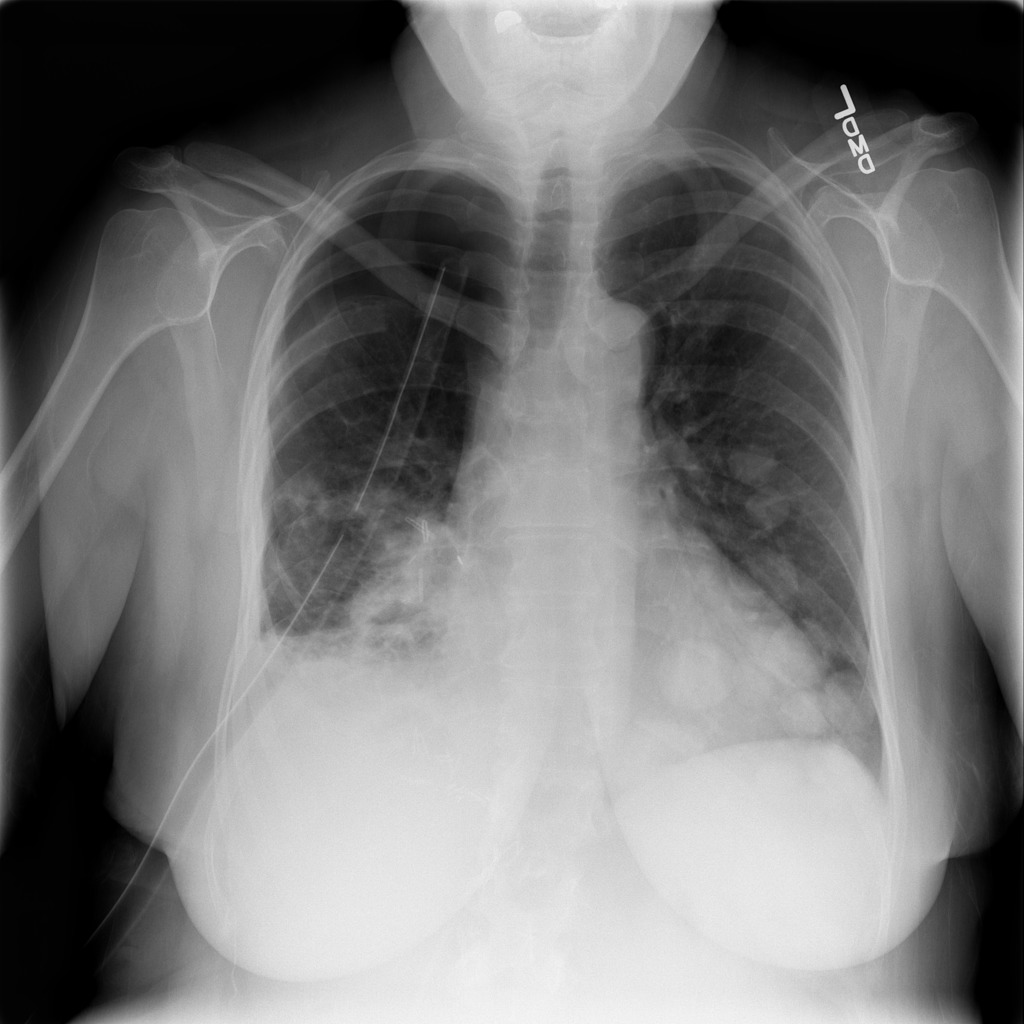

In [17]:
#                                                                        convert to PIL image
pIm = Image.fromarray(one_im)
display(pIm)